In [1]:
#%%
import numpy as np
import theano
import theano.tensor as T

from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to Theano

Theano is a library for doing symbolic computaion. To understand this a comparison
with numpy as probably best...

Lets create to matrices and calculate their product..

In [2]:
#%%
x = np.random.rand(2,3)
y = np.random.rand(3,5)

z = np.dot(x,y)
print(z)

[[ 0.77392937  0.51535409  0.66996421  0.51492404  0.41317254]
 [ 1.01905668  0.45176267  1.45178866  0.28764236  0.80781223]]


So what happened there? We made two matrices and in the process space was allocated
and filled with some random numbers. We then calculated their product, some more
space was allocated for the resulut and then the actual computaion took place!

Lets do the same but using Theano...

In [3]:
#%%
x = T.matrix()
y = T.matrix()

z = T.dot(x,y)
print(z)

dot.0


It looks similar but is in fact very different. No space was allocated no numbers
exist within the matrices, no computation took place. The two variables x,y are just
boxes which at some point in the future can contain data - the size of the matrices has
not yet been specified. The result z will take the contents of the boxes and at some
later point calculate the result, usually on a GPU. Theano is lazy...

How to actualy do the computation? We use a theano function...

In [4]:
#%%
f = theano.function([x,y],z)

The first argument is a list of input variables - the boxes we created. The second
argument is the output, in this case z. To use this function we need to specify some
data...

In [5]:
#%%
x_ = np.random.rand(2,3).astype('float32')
y_ = np.random.rand(3,6).astype('float32')

Its really important that we convert to 32 bit float since Theano is used on GPU's
and most do not have support for 64 bit arithmetic...

We can now use this function...we should get a matrix of size 2x6

In [6]:
#%%
print(f(x_,y_))

[[ 0.93808706  0.47528976  0.73181014  0.8310717   0.78153427  1.34468701]
 [ 0.97384735  0.48261079  0.75044344  0.85351861  0.8545223   1.34327915]]


This function will work with matrices of any size as long as the dimensions
agree (the last dim of x should be the same as first dim of y)

In [7]:
#%%
x_ = np.random.rand(200,300).astype('float32')
y_ = np.random.rand(300,600).astype('float32')

print(f(x_,y_))

[[ 76.19536977  77.577412    71.98574473 ...,  68.47699516  71.44991316
   68.29570919]
 [ 71.8880652   77.06731183  70.6811484  ...,  68.62301482  64.02230922
   70.84369871]
 [ 72.50421841  75.96197356  72.2027585  ...,  63.50477388  66.04461734
   68.00753017]
 ..., 
 [ 73.58246917  77.90906656  75.92221037 ...,  66.2387622   71.30710247
   73.07298482]
 [ 79.14656685  80.06296591  78.36077087 ...,  66.84123124  73.38044538
   73.4694513 ]
 [ 73.85447462  82.2036099   75.31468489 ...,  71.18615556  73.80706612
   73.31360704]]


In [8]:
#%%
x_ = np.random.rand(200,30).astype('float32')
y_ = np.random.rand(300,600).astype('float32')

print(f(x_,y_))

ValueError: Shape mismatch: x has 30 cols (and 200 rows) but y has 300 rows (and 600 cols)
Apply node that caused the error: Dot22(<TensorType(float64, matrix)>, <TensorType(float64, matrix)>)
Toposort index: 0
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix)]
Inputs shapes: [(200, 30), (300, 600)]
Inputs strides: [(240, 8), (4800, 8)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [['output']]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

We get an error due to dimension mismatch...

## Scalars, Vectors and Matrices
Theano can manipulate various data types. Lets do some more complex things...

In [9]:
#%%
a = T.scalar()
a_ = 2
b = T.scalar()
b_ = 56

u = T.vector()
u_ = np.random.rand(5).astype('float32')
v = T.vector()
v_ = np.ones(5).astype('float32')

A = T.matrix()
A_= np.eye(5).astype('float32')
B = T.matrix()
B_ = np.random.rand(5,5).astype('float32')

f1 = a + b
f2 = T.sin(a)

f3 = T.dot(u,v)
f4 = a*v

f5 = A + B
f6 = b*A
f7 = T.dot(B,u)

f1_ = theano.function([a,b],f1)
f2_ = theano.function([a],f2)
f3_ = theano.function([u,v],f3)
f4_ = theano.function([a,v],f4)
f5_ = theano.function([A,B],f5)
f6_ = theano.function([b,A],f6)
f7_ = theano.function([B,u],f7)

print(f1_(a_,b_))
print(f2_(a_))
print(f3_(u_,v_))
print(f4_(a_,v_))
print(f5_(A_,B_))
print(f6_(b_,A_))
print(f7_(B_,u_))

58.0
0.9092974268256817
2.095230946317315
[ 2.  2.  2.  2.  2.]
[[ 1.65750623  0.9985863   0.08165136  0.34941238  0.0427024 ]
 [ 0.17455818  1.60994256  0.05106277  0.97610599  0.62779748]
 [ 0.9499625   0.10699995  1.90161091  0.35821813  0.26351646]
 [ 0.6796028   0.20270863  0.50655931  1.60426182  0.13108216]
 [ 0.41821241  0.7466861   0.46865007  0.32314092  1.99426615]]
[[ 56.   0.   0.   0.   0.]
 [  0.  56.   0.   0.   0.]
 [  0.   0.  56.   0.   0.]
 [  0.   0.   0.  56.   0.]
 [  0.   0.   0.   0.  56.]]
[ 0.42073147  0.88014289  1.26601936  0.89806877  1.25603768]


We can form large chains of computation with various intermediate steps...

In [10]:
#%%
a = T.scalar()
A = T.matrix()
B = T.matrix()

Z = a*A - a*B
Y = T.dot(A,-B)

W = Z + Y

res = theano.function([a,A,B],W)

a_ = 10
A_ = np.random.rand(5,5).astype('float32')
B_ = np.random.rand(5,5).astype('float32')

print(res(a_,A_,B_))

[[-7.05432464 -2.4230089  -1.16397461 -1.48535594  4.4935244 ]
 [ 6.190022   -0.45484789  3.75351636 -8.34118148 -2.11630841]
 [ 2.69066226 -2.48241353  3.03922826 -1.43662643 -2.51633348]
 [ 0.85255354 -3.14829289 -1.78805142 -2.37612974 -2.44438036]
 [ 5.59584637 -3.44232513 -4.3584814  -0.08236526  3.24226955]]


## Derivatives
Theano does derivatives for us, no need for algebra!

Lets find the derivative of the following;
$$ y = sin(x) $$
$$ \frac{dy}{dx} = cos(x) $$

In [11]:
#%%
x = T.scalar()
y = T.sin(x)
y_ = theano.function([x],y)

dydx = T.grad(y,wrt=x)
dydx_ = theano.function([x],dydx)

Lets plot the results...

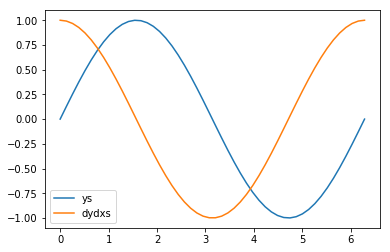

In [12]:
#%%

xs = np.linspace(0,2*np.pi).astype('float32')

ys = np.array([float(y_(k)) for k in xs])
dydxs = np.array([float(dydx_(k)) for k in xs])

plt.plot(xs,ys,label='ys')
plt.plot(xs,dydxs,label='dydxs')
plt.legend(loc=0)

We can do much more complicated derivatives...
$$ F(A,\mathbf{x},\mathbf{y}) = \frac{1}{2} ||\mathbf{y} - A\mathbf{x}||^2 = \frac{1}{2}(\mathbf{y} - A\mathbf{x})^T (\mathbf{y}  - A\mathbf{x}) $$
$$ \frac{\partial F}{\partial \mathbf{x}} = (A\mathbf{x} - \mathbf{y})^T A $$

In [13]:
#%%
A = T.matrix()
x = T.vector()
y = T.vector()

r = y - T.dot(A,x)
f = 0.5*T.dot(r,r)

dfdx = T.grad(f,wrt=x)
dfdx_ = theano.function([A,x,y],dfdx)

A_ = np.random.rand(5,5).astype('float32')
x_ = np.random.rand(5).astype('float32')
y_ = np.random.rand(5).astype('float32')

print(dfdx_(A_,x_,y_))
print(np.dot(np.dot(A_,x_) - y_,A_))

[ 6.4708266   4.20361255  7.35739793  6.29697491  5.97431813]
[ 6.47082663  4.20361233  7.35739756  6.29697466  5.97431803]


Theano makes updating variables, the weights in the NN, really easy...But we need
to understand shared variables first...These are variable that we need to initialise
with data and which we are able to change...

In [14]:
#%%
x = theano.shared(5)
print(x.get_value())

x.set_value(24)
print(x.get_value())

x = theano.shared(np.random.rand(2,3).astype('float32'))
print(x.get_value())

x.set_value(np.eye(4).astype('float32'))
print(x.get_value())

5
24
[[ 0.72260648  0.63073057  0.34068131]
 [ 0.59210879  0.67500979  0.15464243]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


We can update variable in the following way...

In [15]:
#%%
x = theano.shared(0.0)

updates = OrderedDict()
updates[x] = x + 0.1

f = theano.function([],updates=updates)

print(x.get_value())
f()
print(x.get_value())
f()
print(x.get_value())

0.0
0.1
0.2


So each time we call the function f the updates are applied to the shared variable.
We can update multiple variables at the same time...we can evan have a parameter that
controls the update - so it's not always the same update!

In [16]:
#%%
x = theano.shared(10.0)
y = theano.shared(23.0)
a  = T.scalar()

updates = OrderedDict()
updates[x] = x + a
updates[y] = y*a

f = theano.function([a],updates=updates)

f(2)
print(x.get_value())
print(y.get_value())

f(-1)
print(x.get_value())
print(y.get_value())

12.0
46.0
11.0
-46.0


## Putting it all together..
We are going to use theano to solve the following problem;
$$ \underset{x,y}{\text{minimize}} \; x^2 + y^2 + xy -2x $$
We are looking for the values of $x,y$ that makes $x^2 + y^2 + xy - 2x$ as small as
possible...The general method is very similar to what we will do when teaching a neural
network. Find the gradient at a particuar position and then change our initial guess by moving
in the opposite direction...

In [17]:
#%%

# initial guess at solution
np.random.seed(26988)
x0 = 100*np.random.rand()
y0 = 100*np.random.rand()
x = theano.shared(x0)
y = theano.shared(y0)

# the function we want to minimise
f = x**2 + y**2 + x*y - 2*x

# gradients
dfdx = T.grad(f,wrt=x)
dfdy = T.grad(f,wrt=y)

#updates
l_rate = 0.1
updates = OrderedDict()
updates[x] = x - l_rate*dfdx
updates[y] = y - l_rate*dfdy

update_step = theano.function([],updates=updates)
f_val = theano.function([],f)

The model is all set up now to solve the optimisation problem, all that remains is
to repeatedly call our update function until we reach the minimum. According to wolframalpha
the solution should be $x = \frac{4}{3}, y = -\frac{2}{3}$. Usually we would stop calling the update
function once the gradient gets small (when dfdx and dfdy are small) but for now we will just do
100 iterations...

In [18]:
#%%
#%%
for i in range(100):
    update_step()
    if i % 10 == 0:
        print('iter {}:\n @ x={},y={}\n f_val = {}\n'.format(i,
                                                           x.get_value(),
                                                           y.get_value(),
                                                           f_val()))

iter 0:
 @ x=26.706371521941673,y=43.482294589189074
 f_val = 3711.781793490513

iter 10:
 @ x=-0.9581342447267399,y=3.5886253217986916
 f_val = 12.27413660831748

iter 20:
 @ x=0.21971296611648924,y=0.5024268794823284
 f_val = -0.02832967557920849

iter 30:
 @ x=0.9361502600814338,y=-0.26791661341159895
 f_val = -1.1749541062957967

iter 40:
 @ x=1.1945931044994795,y=-0.5278821745261554
 f_val = -1.3140783391759283

iter 50:
 @ x=1.284950515098497,y=-0.6182825981029735
 f_val = -1.330992375736991

iter 60:
 @ x=1.316463087421559,y=-0.6497963854361967
 f_val = -1.3330487275403733

iter 70:
 @ x=1.3274510366461114,y=-0.6607843689817791
 f_val = -1.3332987319131482

iter 80:
 @ x=1.331282303140386,y=-0.6646156364455377
 f_val = -1.333329126608423

iter 90:
 @ x=1.3326181833205433,y=-0.6659515166530805
 f_val = -1.3333328218937919

